In [1]:
import pandas as pd
import os

#### Merging 12 months of sales data into a single CSV file

In [2]:
path="Sales_Data/"
files = [file for file in os.listdir(path)]

all_data = pd.DataFrame()

for file in files:
    current_file = pd.read_csv(path+file)
    all_data = pd.concat([all_data,current_file])

all_data.to_csv("12 months.csv", index=False)

#### Read updated DataFrame

In [3]:
all_data =pd.read_csv("12 months.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning the data

* Droping the NaN

In [4]:
all_data[all_data.isna().any(axis=1)]

all_data.dropna(inplace=True)

* Droping headers

In [5]:
# Finding the rows that contain headers
header_row = [row for row in all_data["Order Date"].str.startswith("Order")]

# droping these rows
all_data.drop(all_data[header_row].index,inplace=True)

#### Adding a month column to the data 

In [6]:
all_data["Month"] = all_data["Order Date"].str.slice(0,2).astype("int")

In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Question 1: What was the the best month for sales? How much was earned that month?

* ####  Adding a Full Price column

In [8]:
# Transforming the cols to numeric 

all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])

all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [9]:
all_data["Full Price"] = all_data["Price Each"] * all_data["Quantity Ordered"]

* #### Plotting the whole sales of all months

In [10]:
all_data.groupby("Month").sum()

,Quantity Ordered,Price Each,Full Price
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


<AxesSubplot:xlabel='Month', ylabel='Sales (in $)'>

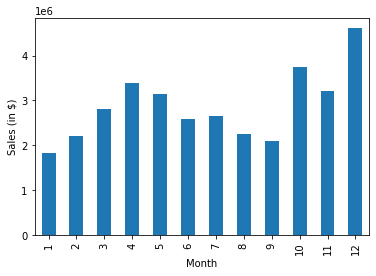

In [11]:
all_data.groupby("Month").sum()["Full Price"].plot(kind="bar", ylabel="Sales (in $)")

In [12]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99


##### So, the best month for sales is December (4.613 Million ) and the worst is January (1.82 Milion )

### What city had the highest number of sales?

* #### adding a city column

In [13]:
temp_series= all_data["Purchase Address"].str.split(",")
temp_list = temp_series.to_list()
temp_list = [f"{row[1]} ({row[2].split(' ')[1]})" for row in temp_list]
all_data["City"] = pd.Series(temp_list, index=all_data.index)

same result using `apply`

In [14]:
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")

In [15]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full Price,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA)
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA)
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA)
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA)
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA)


In [17]:
all_data.groupby(["City","Month"]).sum()["Full Price"]

City           Month
 Atlanta (GA)  1        149159.54
               2        176470.30
               3        231905.38
               4        284448.91
               5        238853.99
                          ...    
 Seattle (WA)  8        189715.09
               9        156369.27
               10       316856.26
               11       252080.13
               12       387317.93
Name: Full Price, Length: 120, dtype: float64

<AxesSubplot:xlabel='City', ylabel='Sales (in $)'>

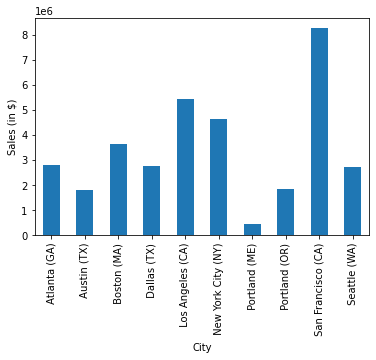

In [18]:
all_data.groupby("City").sum()["Full Price"].plot(kind="bar", ylabel="Sales (in $)")

### Question 3: What time  should we display advertisments to maximize likelihood of customer's buying product ?

* Changing the Order date to a datetime 
* Then adding an Hour column.

In [20]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [23]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full Price,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [25]:
all_data[["Full Price","Hour"]].groupby("Hour").sum()

,Full Price
Hour,
0,713721.27
1,460866.88
2,234851.44
3,145757.89
4,162661.01
5,230679.82
6,448113.00
7,744854.12
8,1192348.97


<AxesSubplot:xlabel='Hour', ylabel='Sales'>

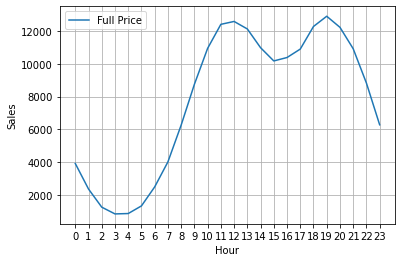

In [35]:
all_data[["Full Price","Hour"]].groupby("Hour").count().plot(ylabel="Orders", xticks=range(0,24),grid="True")

Best time would be around 12 am or 7 bm

### Question 4: What products are most often sold together?

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full Price,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [67]:
duplicates = all_data[all_data["Order ID"].duplicated(keep=False)]
duplicates["Group"] = all_data.groupby("Order ID")["Product"].transform(lambda x:','.join(x))
duplicates = duplicates[["Order ID", "Group"]].drop_duplicates()
duplicates

<ipython-input-67-d3d12f4beb2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates["Group"] = all_data.groupby("Order ID")["Product"].transform(lambda x:','.join(x))


,Order ID,Group
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [77]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicates["Group"]:
    row_list = row.split(",")
    count.update(combinations(row_list,2))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? why do you think it sold the most ?

<ipython-input-104-7748d85bf906>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical")


Text(0, 0.5, 'Price')

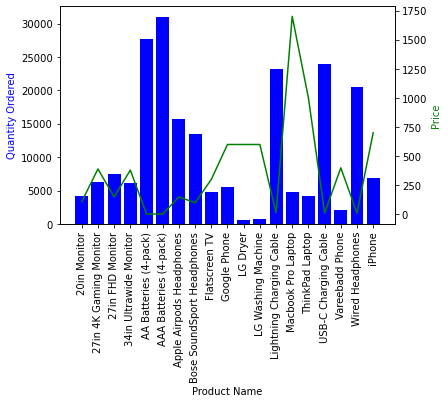

In [104]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
prices = all_data.groupby("Product").mean()["Price Each"]
products = [product for product ,df in product_group]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color ="b")
ax2.plot(products, prices, color = "g")

ax1.set_xlabel("Product Name")
ax1.set_xticklabels(products, rotation="vertical")

ax1.set_ylabel("Quantity Ordered", color = "b")
ax2.set_ylabel("Price", color = "g")

